In [ ]:
#Q1 (inputs and weights refered to section 5)
import numpy as np

class Perceptron:
    def __init__(self, weights):
        self.weights = weights
    def activation_function(self, x):
        return 1 if x >= 0 else 0
    def predict(self, inputs):
        summation = np.dot(inputs, self.weights[1:]) + self.weights[0]
        return self.activation_function(summation)

weights_and = np.array([-0.8, 0.5, 0.5])
perceptron_and = Perceptron(weights_and)
# Test AND Gate
input_and = np.array([1, 1])
output_and = perceptron_and.predict(input_and)
print("AND Gate with i/p", input_and, "gives output:", output_and)

# Define weights for OR gate
weights_or = np.array([-0.3, 0.5, 0.5])
perceptron_or = Perceptron(weights_or)

# Test OR Gate
input_or = np.array([1, 0])
output_or = perceptron_or.predict(input_or)
print("OR Gate with i/p", input_or, "gives output:", output_or)

AND Gate with i/p [1 1] gives output: 1
OR Gate with i/p [1 0] gives output: 1


In [ ]:
#Q2
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

data=pd.read_csv("horseRacing.csv")
# Handling missing values
data.dropna(inplace=True)
# Removing duplicates
data.drop_duplicates(inplace=True)
data

,race_id,horse_id,1-101,1-102,1-103,1-104,1-105,1-106,1-107,1-108,...,3-132,4-105,4-109,4-110,4-114,4-115,4-116,4-117,calc_position,price
278,497240,589032,1.10,0.52,0.45,0.35,0.27,1.62,2.23,0.06,...,-0.39,-0.47,-0.16,0.70,-0.61,-0.55,-0.71,-0.37,6.0,17.00
279,497240,658587,0.47,0.41,-0.54,0.94,0.78,0.28,-0.17,0.94,...,-0.39,2.85,-1.01,-1.01,1.83,1.85,1.77,2.59,8.0,7.00
280,497240,669234,-0.62,-1.20,-0.64,0.04,-0.27,-0.13,-0.80,-0.81,...,-0.39,-0.52,-0.16,-0.16,0.00,-0.18,0.00,-0.61,4.0,6.50
281,497240,693225,-0.55,-1.19,-1.23,-1.21,-1.09,-1.49,-1.13,-1.60,...,-0.39,-0.44,0.70,0.70,-0.15,-0.37,0.00,-0.48,10.0,23.00
282,497240,693680,-0.87,-0.88,-0.75,-0.04,-0.32,-0.22,-0.75,0.59,...,-0.39,-0.53,-0.16,0.70,0.46,0.18,0.35,-0.77,7.0,13.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98326,691538,856440,-0.51,-0.59,-0.48,-0.55,-0.73,-0.44,-0.27,-1.02,...,0.24,-0.49,1.40,1.00,-0.86,-0.70,-0.81,-0.30,3.0,34.00
98327,691538,859919,1.72,1.38,1.54,0.29,1.42,0.12,0.89,0.54,...,-0.96,0.32,-0.35,0.00,0.25,0.28,0.20,1.00,1.0,2.38
98328,691538,861917,-0.61,-0.81,-0.85,-0.67,-0.71,-0.69,-0.91,-0.69,...,1.43,-0.59,0.53,1.00,-0.99,-0.99,-0.81,-0.61,2.0,11.00
98329,691538,879810,-0.64,-0.73,-0.68,-0.71,-0.68,-0.68,-0.91,-0.28,...,-0.96,-0.85,-0.35,-1.00,0.12,0.28,0.20,-1.17,3.0,21.00


In [ ]:
data['price'] = data['price'].apply(lambda x: 1 if x > 0 else 0)

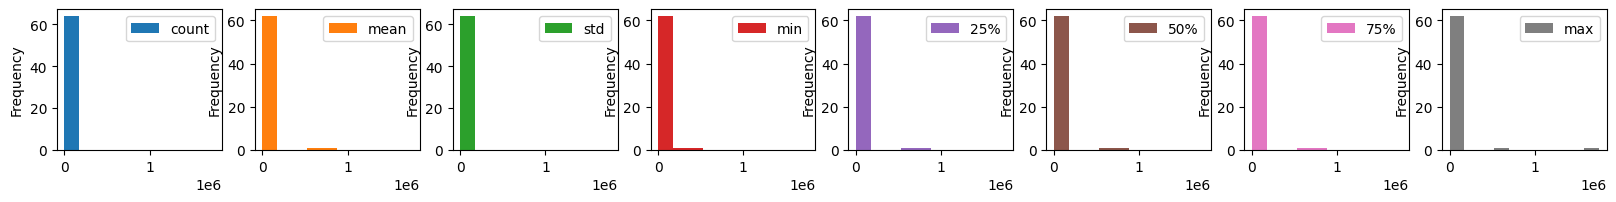

In [ ]:
data.describe().transpose().plot(kind='hist', subplots=True, layout=(7, 8), figsize=(20, 15))
plt.show()

In [ ]:
# Dataset is quite dense with missing values, with many features and possibly some correlations.

# Implement one-hot encoding on the Race ID Column
race_one_hot = pd.get_dummies(data['race_id'], prefix='race')
data = pd.concat([data, race_one_hot], axis=1)
data.drop('race_id', axis=1, inplace=True)
# Horse Id
horse_one_hot = pd.get_dummies(data['horse_id'], prefix='horse')
data = pd.concat([data, horse_one_hot], axis=1)
data.drop('horse_id', axis=1, inplace=True)

In [ ]:
X = data.drop('price', axis=1)
y = data['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Step 10: Train MLP Classifier
mlp = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42)
mlp.fit(X_train, y_train)
predictions = mlp.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

Accuracy: 1.0
